# DETECTION USING PASSIVE-AGGRESSIVE-CLASSIFIER :

### IMPORTING LIBRARIES :

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [17]:
# HERE THE UNNAMED:0 COLUMN AND TITLE COLUMN IS DROPPED. SINCE IT IS NOT REQUIRED FOR CLASSIFYING THE NEWS AS FAKE OR REAL.

In [18]:
data.drop(['Unnamed: 0', 'title'], 1, inplace = True)

In [19]:
data.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [20]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [21]:
data.head(5).append(data.tail(5))

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [22]:
X = data['text']
y = data['label']

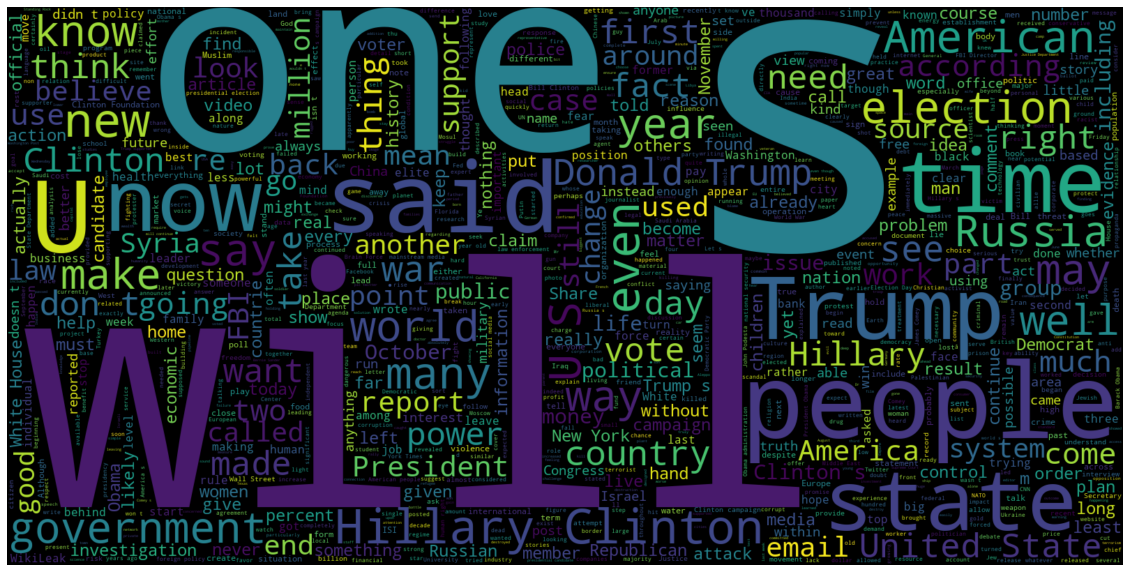

In [83]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data.text[data.label == 'FAKE']))
plt.axis('off')
plt.imshow(wc , interpolation = 'bilinear')

### SPLITTING THE DATASET :

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

### VECTORIZING THE TEXT :

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

X_train = tv.fit_transform(X_train)
X_test = tv.transform(X_test)

In [49]:
print(X_train)

  (1, 32270)	0.06420686322141546
  (1, 16505)	0.11565758565806249
  (1, 20258)	0.0659139488150762
  (1, 29212)	0.11069617089040468
  (1, 41170)	0.059203782424858645
  (1, 31956)	0.11197954908295345
  (1, 46855)	0.10537533965458076
  (1, 20936)	0.061372025208886564
  (1, 14530)	0.05878609725192232
  (1, 31946)	0.04853033651048826
  (1, 51812)	0.1383154132935174
  (1, 54666)	0.07610361638659016
  (1, 22375)	0.054518920206491475
  (1, 2800)	0.08255019606326065
  (1, 2135)	0.0895756378499593
  (1, 32261)	0.05689385895716151
  (1, 2802)	0.08504090157187026
  (1, 30605)	0.03903247948963306
  (1, 58512)	0.05913349015141017
  (1, 46868)	0.07296717295409837
  (1, 25555)	0.04730939871517357
  (1, 17950)	0.0795798042597366
  (1, 59722)	0.0694045786155423
  (1, 46230)	0.06334390732791358
  (1, 28335)	0.08691665555804866
  :	:
  (5067, 2289)	0.019218479819126843
  (5067, 13238)	0.018298271496205727
  (5067, 41122)	0.022391659073531005
  (5067, 24035)	0.03673559733585426
  (5067, 12688)	0.0743775214

### TRAINING OUR MODEL :

In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter = 100)
model.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

In [76]:
y_pred = model.predict(X_test)

In [77]:
print(y_pred)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']


### ACCURACY :

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
print(f'Accuracy : {round(ac*100, 2)}%')

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix :\n", cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report :\n", cr)

Accuracy : 93.37%

Confusion Matrix :
 [[568  40]
 [ 44 615]]

Classification Report :
               precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       608
        REAL       0.94      0.93      0.94       659

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

